### **1. Data Loading & EDA**

**Import Libraries**





In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [3]:
df = pd.read_csv('/workspaces/Fraud_Prediction/data/raw/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0.0


In [ ]:
df = pd.read_csv('/workspaces/Fraud_Prediction/data/raw/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df=df.drop("isFlaggedFraud",axis=1)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


###### **2. Data Descriptive**

In [6]:
print("Keys of df: \n{}".format(df.keys()))

Keys of df: 
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')


In [7]:
print(df['isFraud'])

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


In [8]:
df.shape

(6362620, 10)

In [9]:
print(df['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [10]:
grouped_data = df['isFraud'].value_counts(normalize=True)
print(grouped_data)

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [13]:
df.duplicated().sum()

0

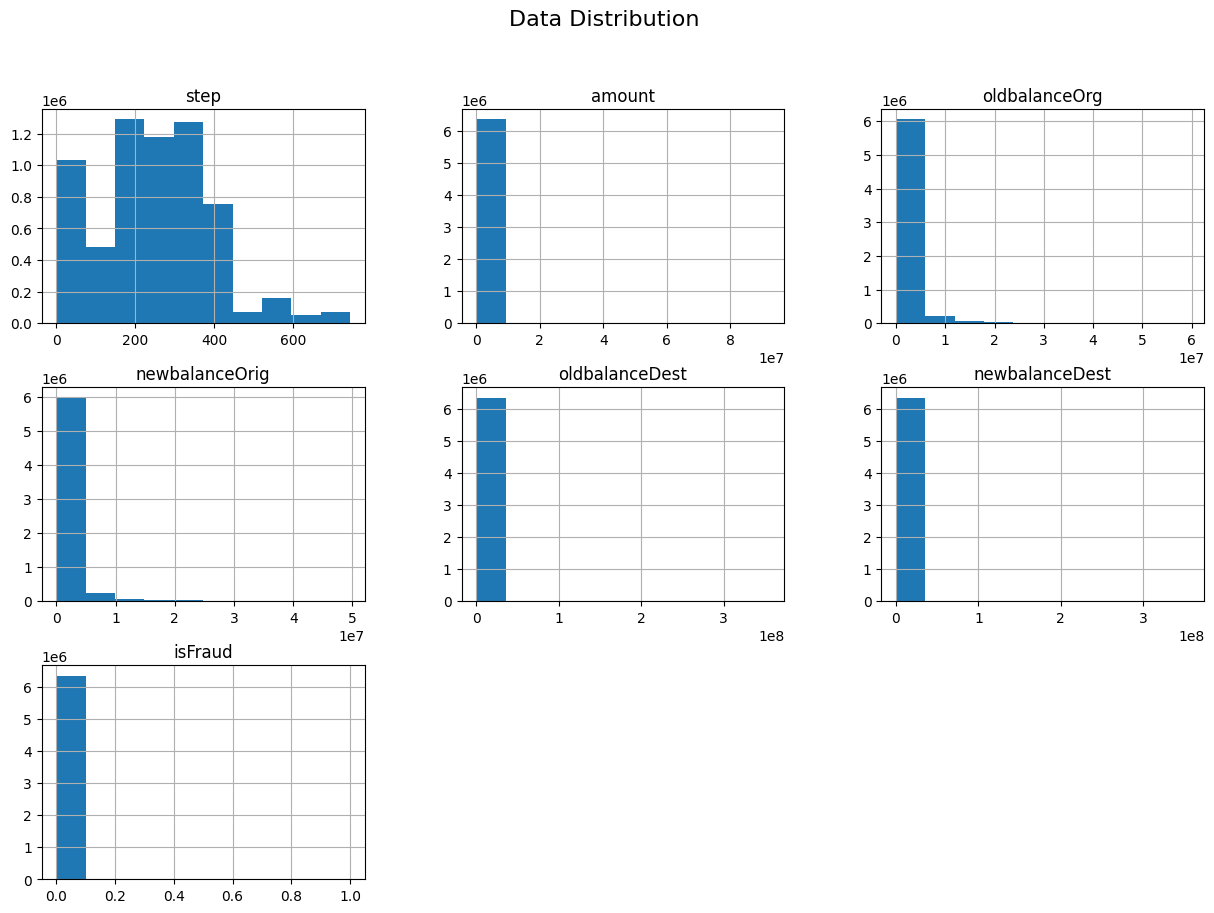

<Figure size 200x200 with 0 Axes>

In [14]:
df.hist(figsize=(15,10))
plt.suptitle("Data Distribution", fontsize=16)
plt.figure(figsize=(2, 2))
plt.show()

<ipython-input-15-39cab31ecd7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud',data=df, palette='hls')


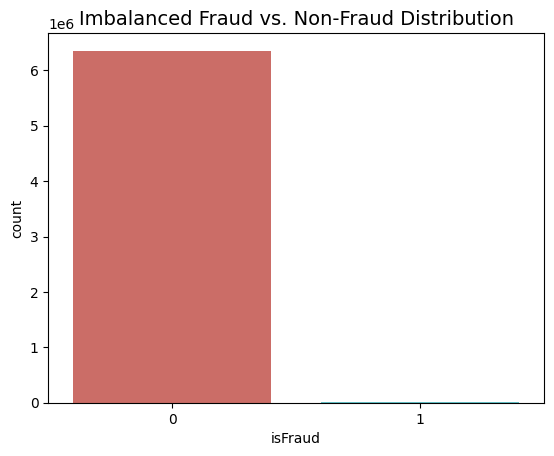

<Figure size 500x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
sns.countplot(x='isFraud',data=df, palette='hls')
plt.title("Imbalanced Fraud vs. Non-Fraud Distribution", fontsize=14)
plt.figure(figsize=(5, 5))
plt.show()
plt.savefig('count_plot')

<Axes: title={'center': 'Imbalanced Fraud vs. Non-Fraud Distribution'}, ylabel='amount'>

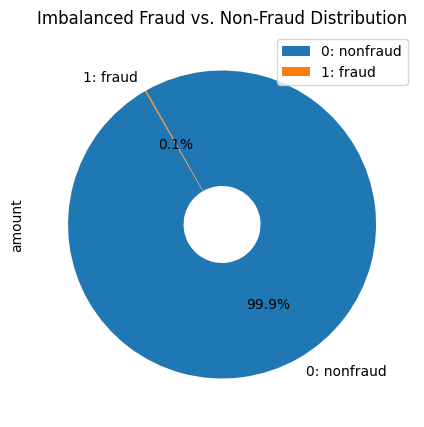

In [16]:
ratio_df = df[['isFraud', 'amount']].groupby(['isFraud']).count()
ratio_df.plot.pie(y='amount', figsize=(5, 5), labels=['0: nonfraud', '1: fraud'], autopct='%.1f%%', startangle=120, wedgeprops={'width': 0.75},title = 'Imbalanced Fraud vs. Non-Fraud Distribution')

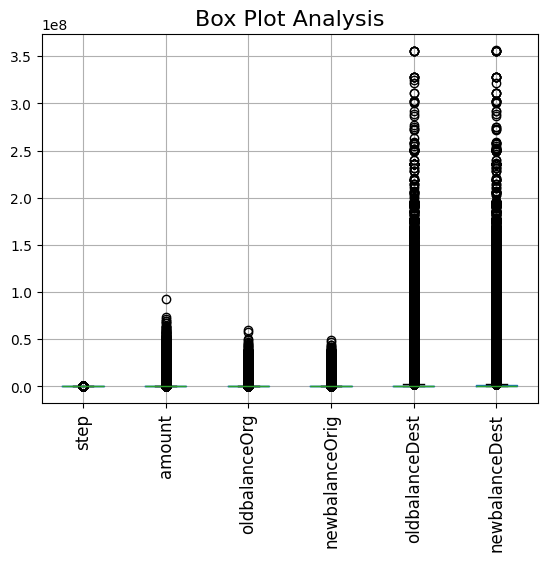

<Figure size 500x500 with 0 Axes>

In [17]:
#boxplot
df.boxplot(column=["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"])
plt.title("Box Plot Analysis", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.figure(figsize=(5, 5))
plt.show()

In [18]:
A_test=stats.f_oneway(df['oldbalanceOrg'][df['isFraud']==1],df['oldbalanceOrg'][df['isFraud']==0])
print(A_test)

F_onewayResult(statistic=656.1317238056401, pvalue=1.0542893556073786e-144)


In [19]:
A_test=stats.f_oneway(df['newbalanceOrig'][df['isFraud']==1],df['newbalanceOrig'][df['isFraud']==0])
print(A_test)

F_onewayResult(statistic=422.45836751879915, pvalue=7.168312431125908e-94)


### **2. Data Preprocessing**

**1. Missing values**

In [20]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


**2. Balancing Data**

<ipython-input-21-280745cf517b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=normalized_df, palette='hls')


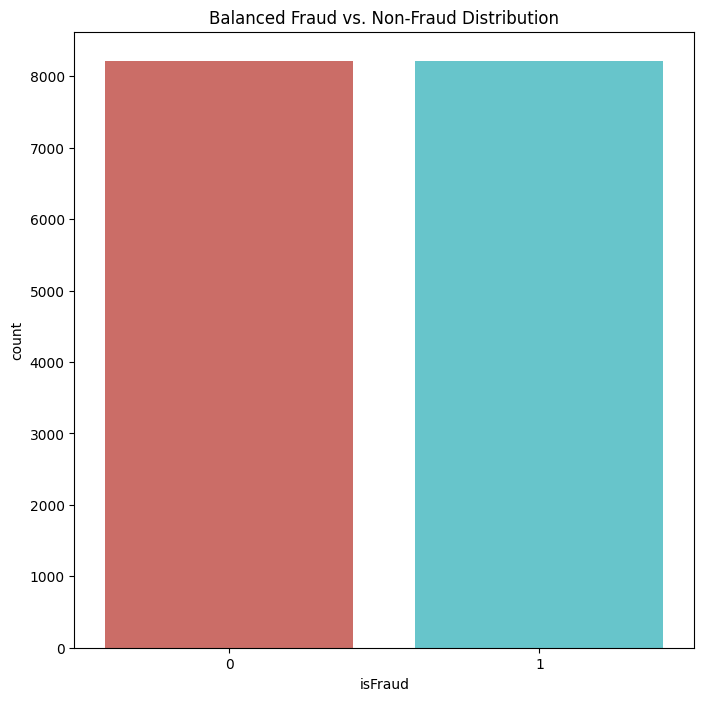

In [21]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)
# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['isFraud'] == 1]
#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['isFraud'] == 0].sample(n=8213,random_state=42)
# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot(x='isFraud', data=normalized_df, palette='hls')
plt.title('Balanced Fraud vs. Non-Fraud Distribution')
plt.show()

In [22]:
normalized_df['isFraud'].value_counts()

,count
isFraud,
1,8213
0,8213


**3. Data normalization and standardization**

In [23]:
normalized_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1291987,135,TRANSFER,7927.06,C3592918,7927.06,0.0,C956442492,0.00,0.00,1
6276620,639,TRANSFER,246250.77,C187250365,246250.77,0.0,C1147976411,0.00,0.00,1
347735,16,CASH_OUT,121626.82,C828364266,121626.82,0.0,C101179743,653744.34,775371.16,1
3658949,275,CASH_OUT,2607790.58,C234957990,2607790.58,0.0,C1475995578,7640097.83,10247888.41,1
4486593,324,TRANSFER,10211.81,C1057819107,10211.81,0.0,C97284144,0.00,0.00,1


In [24]:
mmscaler = MinMaxScaler()
cols =  ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
normalized_df[cols] = mmscaler.fit_transform(normalized_df[cols])

In [25]:
sc = StandardScaler()
normalized_df[cols] = sc.fit_transform(normalized_df[cols])

In [26]:
normalized_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1291987,-0.885640,TRANSFER,-0.439942,C3592918,-0.379990,-0.210901,C956442492,-0.247151,-0.339243,1
6276620,1.724034,TRANSFER,-0.310520,C187250365,-0.307259,-0.210901,C1147976411,-0.247151,-0.339243,1
347735,-1.501813,CASH_OUT,-0.378197,C828364266,-0.345291,-0.210901,C101179743,-0.051399,-0.128875,1
3658949,-0.160731,CASH_OUT,0.971920,C234957990,0.413437,-0.210901,C1475995578,2.040549,2.441135,1
4486593,0.092988,TRANSFER,-0.438701,C1057819107,-0.379293,-0.210901,C97284144,-0.247151,-0.339243,1


In [27]:
normalized_df.shape

(16426, 10)

**4. Encoding**


In [28]:
cols = ['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']
new_df = normalized_df[cols]

In [29]:
new_df['type'].unique()

array(['TRANSFER', 'CASH_OUT', 'CASH_IN', 'PAYMENT', 'DEBIT'],
      dtype=object)

In [30]:
dataC = pd.get_dummies(new_df, prefix=['Type'], columns=['type'])
display(dataC.columns)
dataC.head(5)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'Type_CASH_IN', 'Type_CASH_OUT',
       'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER'],
      dtype='object')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Type_CASH_IN,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
1291987,-0.885640,-0.439942,-0.379990,-0.210901,-0.247151,-0.339243,1,False,False,False,False,True
6276620,1.724034,-0.310520,-0.307259,-0.210901,-0.247151,-0.339243,1,False,False,False,False,True
347735,-1.501813,-0.378197,-0.345291,-0.210901,-0.051399,-0.128875,1,False,True,False,False,False
3658949,-0.160731,0.971920,0.413437,-0.210901,2.040549,2.441135,1,False,True,False,False,False
4486593,0.092988,-0.438701,-0.379293,-0.210901,-0.247151,-0.339243,1,False,False,False,False,True


In [31]:
dataC['Type_CASH_IN']=dataC['Type_CASH_IN'].astype(int)
dataC['Type_CASH_OUT']=dataC['Type_CASH_OUT'].astype(int)
dataC['Type_DEBIT']=dataC['Type_DEBIT'].astype(int)
dataC['Type_PAYMENT']=dataC['Type_PAYMENT'].astype(int)
dataC['Type_TRANSFER']=dataC['Type_TRANSFER'].astype(int)

In [32]:
dataC.shape

(16426, 12)

In [33]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15)
    plt.legend()
    plt.title("Balanced Fraud vs. Non-Fraud Distribution")
    plt.figure(figsize=(5, 5))
    return plt.show()
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = dataC.drop('isFraud', axis = 1).values
    y = dataC['isFraud'].values
    return X, y

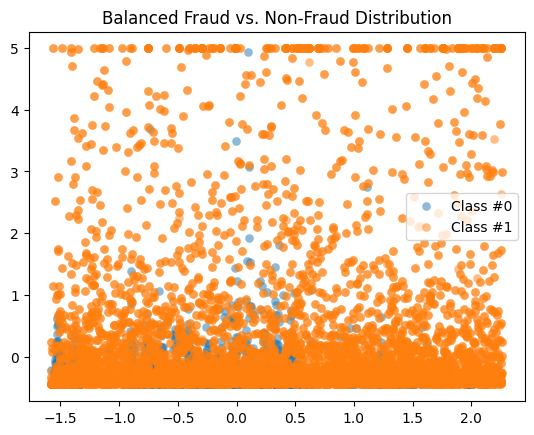

<Figure size 500x500 with 0 Axes>

In [34]:
X, y = prep_data(dataC)
plot_data(X,y)

In [ ]:
dataC.to_csv("../data/processed/processed_data.csv", index=False)